In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
df=pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [4]:
df.isna().sum()

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

In [5]:
df=df[['Country','Age','EdLevel','YearsCodePro','Employment','ConvertedComp']]
df=df.rename({'ConvertedComp':'Salary','YearsCodePro':'ProfessionalExp'},axis=1)
df.head()

,Country,Age,EdLevel,ProfessionalExp,Employment,Salary
0,Germany,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,31.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


# Checking Null Value

In [6]:
df.isna().sum()

Country              389
Age                19015
EdLevel             7030
ProfessionalExp    18112
Employment           607
Salary             29705
dtype: int64

<AxesSubplot:>

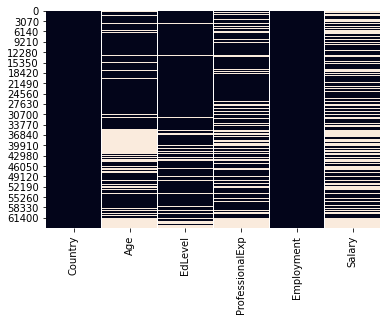

In [7]:
sns.heatmap(df.isnull(),cbar=False)

In [8]:
df = df[df["Salary"].notnull()]
df.head()

,Country,Age,EdLevel,ProfessionalExp,Employment,Salary
7,United States,36.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,22.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,23.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,49.0,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,53.0,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [9]:
df.isna().sum()

Country               0
Age                4160
EdLevel             568
ProfessionalExp     135
Employment           39
Salary                0
dtype: int64

# Handling Missing Values

In [10]:
df['Age'].unique()

array([ 36. ,  22. ,  23. ,  49. ,  53. ,  27. ,  45. ,  25. ,  32. ,
        24. ,   nan,  31. ,  39. ,  34. ,  35. ,  38. ,  28. ,  44. ,
        48. ,  20. ,  26. ,  42. ,  21. ,  29. ,  30. ,  41. ,  37. ,
        63. ,  33. ,  43. ,  40. ,  51. ,  57. ,  60. ,  50. ,  59. ,
        62. ,  52. ,  46. ,  49.5,  56. ,  47. ,  19. ,  54. ,  70. ,
        55. ,  61. ,  18. ,  26.8,  64. ,  58. ,  65. ,  84. ,  73. ,
        17. ,  99. ,  68. ,  74. ,  69. ,  16. ,  85. ,  32.5,  66. ,
        23.8,  72. ,  67. ,  96. ,  79. , 279. ,  22.5,  27.5,  15. ,
        89. ,   1. ,  98. ,  10. ,  13. ,  78. ,  31.5,  39.5,  71. ,
        81. ,  83. ,  12. ,  75. ])

In [11]:

df['Age']=df['Age'].astype('float')
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [12]:
df = df[df["Age"]>=21]
df = df[df['Age']<=70]
df['Age'].unique()

array([36.       , 22.       , 23.       , 49.       , 53.       ,
       27.       , 45.       , 25.       , 32.       , 24.       ,
       32.1643875, 31.       , 39.       , 34.       , 35.       ,
       38.       , 28.       , 44.       , 48.       , 26.       ,
       42.       , 21.       , 29.       , 30.       , 41.       ,
       37.       , 63.       , 33.       , 43.       , 40.       ,
       51.       , 57.       , 60.       , 50.       , 59.       ,
       62.       , 52.       , 46.       , 49.5      , 56.       ,
       47.       , 54.       , 70.       , 55.       , 61.       ,
       26.8      , 64.       , 58.       , 65.       , 68.       ,
       69.       , 32.5      , 66.       , 23.8      , 67.       ,
       22.5      , 27.5      , 31.5      , 39.5      ])

In [13]:
df['EdLevel'].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)', nan,
       'Primary/elementary school',
       'I never completed any formal education'], dtype=object)

In [14]:
df['EdLevel']=df['EdLevel'].fillna(df['EdLevel'].mode()[0])

In [15]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [16]:
df['Employment'].unique()

array(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed part-time', nan], dtype=object)

In [17]:
df['Employment']=df['Employment'].fillna(df['Employment'].mode()[0])

In [18]:
def clean_emp(x):
    if 'Employed full-time' in x:
        return 'full-time'
    if 'Independent contractor, freelancer, or self-employed' in x:
        return 'self-employed'
    if 'Employed part-time' in x :
        return 'part-time'
    return 'other'

df['Employment'] = df['Employment'].apply(clean_emp)

In [19]:
df['Employment'].value_counts()

full-time        30316
self-employed     2985
part-time          943
Name: Employment, dtype: int64

In [20]:
df['ProfessionalExp'].unique()

array(['13', '4', '2', '7', '20', '1', '23', '3', '12', '10', '14', '29',
       '6', '28', '8', '15', '11', '25', '5', '9', 'Less than 1 year',
       '21', '16', '19', '35', '18', '24', '32', '22', '30', '38', '26',
       '17', nan, '27', 'More than 50 years', '40', '33', '34', '36',
       '39', '37', '31', '41', '45', '42', '43', '44', '48', '46', '50',
       '47'], dtype=object)

In [21]:
def clean_exp(x):
    if x=='More than 50 years':
        return 50
    if x=='Less than 1 year':
        return 0.5
    return float(x)
df['ProfessionalExp']=df['ProfessionalExp'].apply(clean_exp)

In [22]:

df['ProfessionalExp']=df['ProfessionalExp'].astype('float')
df['ProfessionalExp'].fillna(df['ProfessionalExp'].mean(),inplace=True)

In [23]:
df.isna().sum()

Country            0
Age                0
EdLevel            0
ProfessionalExp    0
Employment         0
Salary             0
dtype: int64

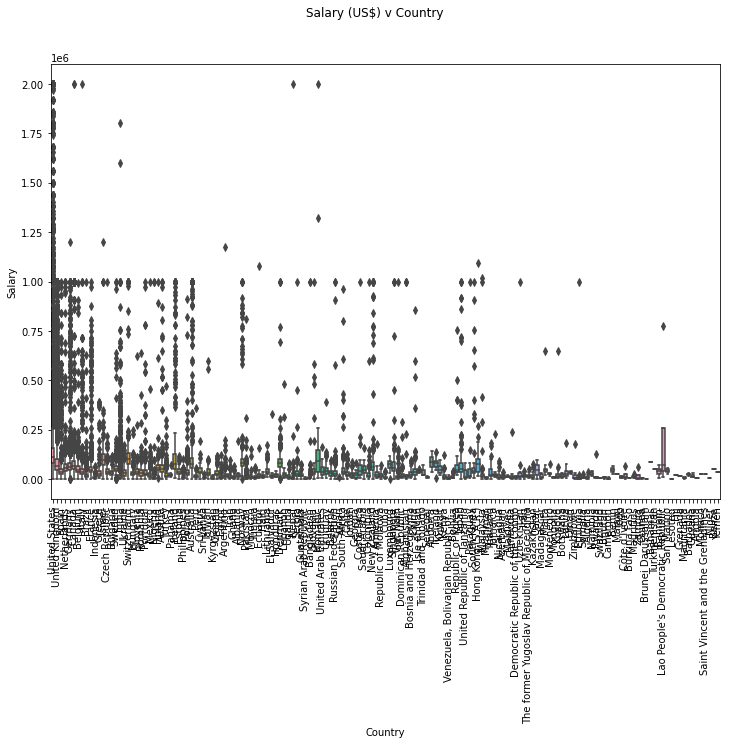

In [24]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='Country',y='Salary')
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [25]:
def shorten_categories(categories, range1):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= range1:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [26]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                 10209
United States          8075
India                  2655
United Kingdom         2537
Germany                2273
Canada                 1329
France                 1122
Brazil                 1100
Netherlands             800
Poland                  787
Australia               759
Spain                   758
Italy                   654
Russian Federation      608
Sweden                  578
Name: Country, dtype: int64

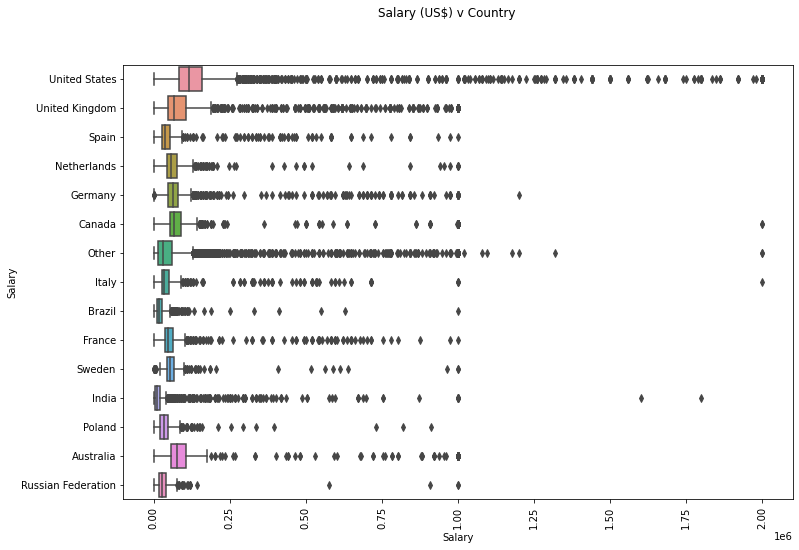

In [27]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x='Salary',y='Country')
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [28]:
df = df[df["Salary"] <= 220000]
df = df[df["Salary"] >= 10000]

In [29]:
a=df[(df['Country']=='United Kingdom') & (df['Salary']>130000)].index

In [30]:
df.drop(a,inplace=True)

In [31]:
b=df[(df['Country']=='Spain') & (df['Salary']>80000)].index
df.drop(b,inplace=True)

In [32]:
c=df[(df['Country']=='Netherlands') & (df['Salary']>110000)].index
df.drop(c,inplace=True)

In [33]:
d=df[(df['Country']=='Germany') & (df['Salary']>115000)].index
df.drop(d,inplace=True)

In [34]:
e=df[(df['Country']=='Canada') & (df['Salary']>130000)].index
df.drop(e,inplace=True)

In [35]:
f=df[(df['Country']=='Other') & (df['Salary']>100000)].index
df.drop(f,inplace=True)

In [36]:
g=df[(df['Country']=='Italy') & (df['Salary']>55000)].index
df.drop(g,inplace=True)

In [37]:
h=df[(df['Country']=='Brazil') & (df['Salary']>40000)].index
df.drop(h,inplace=True)

In [38]:
i=df[(df['Country']=='France') & (df['Salary']>80000)].index
df.drop(i,inplace=True)

In [39]:
j=df[(df['Country']=='Sweden') & (df['Salary']>80000)].index
df.drop(j,inplace=True)

In [40]:
k=df[(df['Country']=='India') & (df['Salary']>40000)].index
df.drop(k,inplace=True)

In [41]:
l=df[(df['Country']=='Poland') & (df['Salary']>70000)].index
df.drop(l,inplace=True)

In [42]:
m=df[(df['Country']=='Australia') & (df['Salary']>130000)].index
df.drop(m,inplace=True)

In [43]:
n=df[(df['Country']=='Russian Federation') & (df['Salary']>50000)].index
df.drop(n,inplace=True)

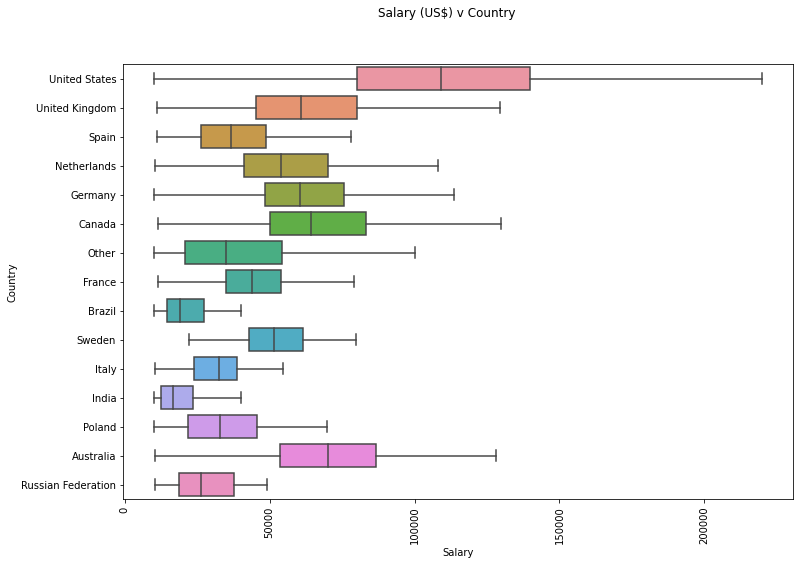

In [44]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,x="Salary",y="Country")
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.show()

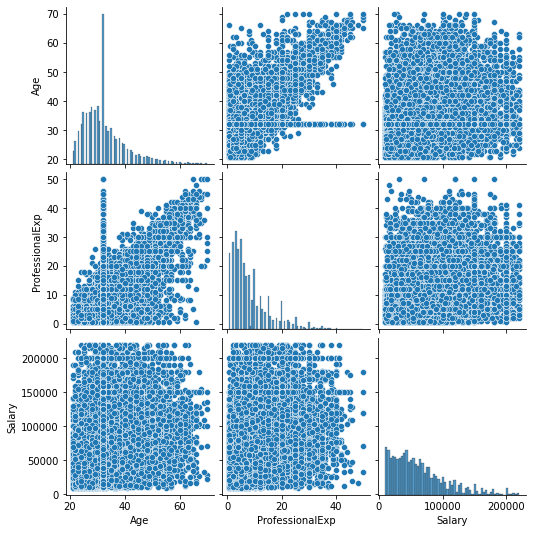

In [45]:
sns.pairplot(df)

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()


array([0, 2, 1, 3])

In [48]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()

array([14, 13, 11,  7,  4,  2,  8,  3,  1, 12,  6,  5,  9,  0, 10])

In [49]:
le_emp = LabelEncoder()
df['Employment'] = le_emp.fit_transform(df['Employment'])
df["Employment"].unique()

array([0, 2, 1])

In [50]:
df.reset_index(inplace=True)
df.drop(["index"],axis=1,inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26625 entries, 0 to 26624
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          26625 non-null  int32  
 1   Age              26625 non-null  float64
 2   EdLevel          26625 non-null  int32  
 3   ProfessionalExp  26625 non-null  float64
 4   Employment       26625 non-null  int32  
 5   Salary           26625 non-null  float64
dtypes: float64(3), int32(3)
memory usage: 936.2 KB


In [52]:
df

,Country,Age,EdLevel,ProfessionalExp,Employment,Salary
0,14,36.000000,0,13.0,0,116000.0
1,13,22.000000,2,4.0,0,32315.0
2,13,23.000000,0,2.0,0,40070.0
3,11,49.000000,1,7.0,0,14268.0
4,7,53.000000,1,20.0,0,38916.0
...,...,...,...,...,...,...
26620,14,32.164388,2,4.0,0,150000.0
26621,8,32.164388,0,4.0,0,38208.0
26622,8,32.164388,0,5.0,0,19428.0
26623,8,32.164388,0,3.0,0,15048.0


In [53]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [54]:
from sklearn.model_selection import train_test_split,cross_val_score
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

# Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

In [56]:
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse,r2_score as r

In [57]:
print(f'MAE: {mae(ytest,ypred)}')
print(f'MSE: {mse(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred))}')
print(f'R2_Score: {r(ytest,ypred)}')

MAE: 27336.03017691921
MSE: 1190954208.4892333
RMSE: 165.33611274285846
R2_Score: 0.3431605511946122


In [58]:
def adj_r2(k, r2, n):
    res = 1 - (1-r2) * ((n-1)/(n-(k+1)))
    return res

In [59]:
columns = []
i = 1

for col in x:
    columns.append(col)
    xnew = df[columns]
    
    xtrain, xtest, ytrain, ytest = train_test_split(xnew, y, test_size=0.3, random_state=1)
    
    linreg = LinearRegression()
    linreg.fit(xtrain, ytrain)
    
    r2 = linreg.score(xtest, ytest)
    n = len(xtest)
    
    result = adj_r2(i, r2, n)
    
    print(f"cols -: {i}, r2_score -: {r2}, Adj.r2-: {result}")
    i = i + 1
    

cols -: 1, r2_score -: 0.25571660334673474, Adj.r2-: 0.25562340482473966
cols -: 2, r2_score -: 0.3116119589250943, Adj.r2-: 0.3114395386267663
cols -: 3, r2_score -: 0.3119502875585284, Adj.r2-: 0.3116917518449356
cols -: 4, r2_score -: 0.3359648566791642, Adj.r2-: 0.3356321320677045
cols -: 5, r2_score -: 0.3431605511946122, Adj.r2-: 0.3427491007756662


In [60]:
dic={'ActualY':ytest,'Predicted Y':ypred}
predval=pd.DataFrame(dic)
predval

,ActualY,Predicted Y
22120,140000.0,97515.031636
23062,50000.0,74258.982935
14514,56211.0,61142.935703
13029,120000.0,79916.786704
19331,81074.0,47569.345328
...,...,...
3990,62697.0,30086.941272
20300,30372.0,66851.503223
7140,125000.0,82822.352346
3325,21000.0,45884.212539


In [61]:
for i in range(100,1000,50):
    l1=Ridge(alpha=i)
    l1.fit(xtrain,ytrain)
    yp=l1.predict(xtest)
    print(f'{i} -: {l1.score(xtest,ytest)}')

100 -: 0.34311983101402344
150 -: 0.34309860346730103
200 -: 0.3430768513854139
250 -: 0.34305461213850463
300 -: 0.3430319209079282
350 -: 0.34300881082165924
400 -: 0.3429853130805033
450 -: 0.3429614570758035
500 -: 0.3429372704992726
550 -: 0.3429127794455282
600 -: 0.34288800850786894
650 -: 0.34286298086777645
700 -: 0.34283771837859933
750 -: 0.34281224164383284
800 -: 0.3427865700903757
850 -: 0.3427607220371227
900 -: 0.34273471475921335
950 -: 0.3427085645482423


In [62]:
l2=Ridge(alpha=11)
l2.fit(xtrain,ytrain)
ypredl1=l2.predict(xtest)


In [63]:
print(f'Accuracy: {r(ytest,ypredl1)}')

Accuracy: 0.34315619295508504


In [64]:
for i in range(100,1000,50):
    l1=Ridge(alpha=i)
    l1.fit(xtrain,ytrain)
    yp=l1.predict(xtest)
    print(f'{i} -: {l1.score(xtest,ytest)}')

100 -: 0.34311983101402344
150 -: 0.34309860346730103
200 -: 0.3430768513854139
250 -: 0.34305461213850463
300 -: 0.3430319209079282
350 -: 0.34300881082165924
400 -: 0.3429853130805033
450 -: 0.3429614570758035
500 -: 0.3429372704992726
550 -: 0.3429127794455282
600 -: 0.34288800850786894
650 -: 0.34286298086777645
700 -: 0.34283771837859933
750 -: 0.34281224164383284
800 -: 0.3427865700903757
850 -: 0.3427607220371227
900 -: 0.34273471475921335
950 -: 0.3427085645482423


# K-Nearest Neighbors

In [65]:
from sklearn.neighbors import KNeighborsRegressor


In [66]:

accuracy=[]
for i in range(1,31):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    pred=knn.predict(xtest)
    ac=r(ytest,pred)
    accuracy.append(ac)

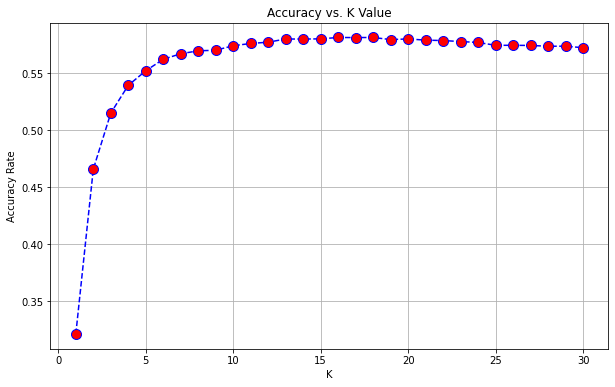

In [67]:
plt.figure(figsize=(10,6))
plt.plot(range(1,31), accuracy, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.grid(True)
plt.show()

In [68]:
knn= KNeighborsRegressor(n_neighbors=16)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [69]:
print(f'MAE: {mae(ytest,ypred)}')
print(f'MSE: {mse(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred))}')
print(f'R2_Score: {r(ytest,ypred)}')

MAE: 20641.271133262395
MSE: 758974570.7785648
RMSE: 143.67070381000573
R2_Score: 0.5814075510427107


In [70]:
dic={'ActualY': ytest,'Predicted Y':ypred}
predval=pd.DataFrame(dic)
predval

,ActualY,Predicted Y
22120,140000.0,125281.2500
23062,50000.0,59771.0625
14514,56211.0,55934.3125
13029,120000.0,115418.7500
19331,81074.0,65752.1250
...,...,...
3990,62697.0,47466.8125
20300,30372.0,40220.5625
7140,125000.0,101365.0000
3325,21000.0,27583.6250


# Support Vector Machine

In [71]:
from sklearn.svm import SVR

In [72]:
svm = SVR(kernel='linear')
svm.fit(xtrain,ytrain)

SVR(kernel='linear')

In [73]:
ypred=svm.predict(xtest)

In [74]:
print(f'MAE: {mae(ytest,ypred)}')
print(f'MSE: {mse(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred))}')
print(f'R2_Score: {r(ytest,ypred)}')

MAE: 27245.05082871793
MSE: 1280960491.2562037
RMSE: 165.06074890390485
R2_Score: 0.2935199548221673


In [75]:
dic={'ActualY': ytest,'Predicted Y':ypred}
predval=pd.DataFrame(dic)
predval

,ActualY,Predicted Y
22120,140000.0,83626.898332
23062,50000.0,60380.189070
14514,56211.0,73596.983231
13029,120000.0,68954.730376
19331,81074.0,44615.524088
...,...,...
3990,62697.0,27737.523735
20300,30372.0,61071.573144
7140,125000.0,69208.786621
3325,21000.0,38766.227968


# DecisionTree

In [76]:
from sklearn.tree import DecisionTreeRegressor

In [77]:
dt= DecisionTreeRegressor()

In [78]:
dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [79]:
ypred=dt.predict(xtest)

In [80]:
print(f'MAE: {mae(ytest,ypred)}')
print(f'MSE: {mse(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred))}')
print(f'R2_Score: {r(ytest,ypred)}')

MAE: 21725.805664674655
MSE: 915543667.596334
RMSE: 147.39676273471767
R2_Score: 0.49505598645636273


In [81]:
dt.feature_importances_

array([0.68464488, 0.10024785, 0.03078986, 0.16494302, 0.01937439])

In [82]:
dt1 = DecisionTreeRegressor(max_depth=10)
dt1.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

print(f'MAE: {mae(ytest,ypred)}')
print(f'MSE: {mse(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred))}')
print(f'R2_Score: {r(ytest,ypred)}')

MAE: 21725.805664674655
MSE: 915543667.596334
RMSE: 147.39676273471767
R2_Score: 0.49505598645636273


In [83]:
for i in range(1,50):
    dt2 = DecisionTreeRegressor(max_depth=i)
    dt2.fit(xtrain, ytrain)
    ypred = dt2.predict(xtest)
    print(f" {i} -: {r(ytest, ypred)}")

 1 -: 0.4837682508413781
 2 -: 0.5525298696110623
 3 -: 0.5746893752930841
 4 -: 0.600371920595373
 5 -: 0.6232174245291783
 6 -: 0.6419086282693953
 7 -: 0.6399940117643823
 8 -: 0.6384307953645914
 9 -: 0.6324784326645042
 10 -: 0.6219127723843618
 11 -: 0.6130529831624765
 12 -: 0.5937639322370221
 13 -: 0.5707571733136712
 14 -: 0.5591553820876678
 15 -: 0.5441348849597853
 16 -: 0.5340107367047446
 17 -: 0.5255871227454847
 18 -: 0.5174171879831135
 19 -: 0.5099395444350401
 20 -: 0.5055267852258141
 21 -: 0.5049119536717441
 22 -: 0.504278445721913
 23 -: 0.4981498953431207
 24 -: 0.4973899400349664
 25 -: 0.4941732622260815
 26 -: 0.4965475669304734
 27 -: 0.4958792688287057
 28 -: 0.49427905087206303
 29 -: 0.4938416291951655
 30 -: 0.49602242925697937
 31 -: 0.4925603730772121
 32 -: 0.4958784373187758
 33 -: 0.49322245374598894
 34 -: 0.49444388783576554
 35 -: 0.4937624252984345
 36 -: 0.49476803345472453
 37 -: 0.4952834982666311
 38 -: 0.4937357591785625
 39 -: 0.492089581

In [84]:
dt3 = DecisionTreeRegressor(max_depth=6)
dt3.fit(xtrain,ytrain)
ypred=dt3.predict(xtest)

print(f'MAE: {mae(ytest,ypred)}')
print(f'MSE: {mse(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred))}')
print(f'R2_Score: {r(ytest,ypred)}')

MAE: 18851.742226807317
MSE: 649276511.8810691
RMSE: 137.30164684666866
R2_Score: 0.6419086282693953


In [85]:
dt4 = DecisionTreeRegressor(min_samples_leaf=10)
dt4.fit(xtrain,ytrain)
ypred=dt4.predict(xtest)

print(f'MAE: {mae(ytest,ypred)}')
print(f'MSE: {mse(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred))}')
print(f'R2_Score: {r(ytest,ypred)}')

MAE: 18835.45552175246
MSE: 674089346.2174162
RMSE: 137.24232409046584
R2_Score: 0.6282237625435666


In [86]:
for i in range(1,75):
    dt5 = DecisionTreeRegressor(min_samples_leaf=i)
    dt5.fit(xtrain, ytrain)
    ypred = dt5.predict(xtest)
    print(f" {i} -: {r(ytest, ypred)}")

 1 -: 0.4946200389466868
 2 -: 0.551232261888742
 3 -: 0.5750481942809029
 4 -: 0.5899494382618115
 5 -: 0.604632923849749
 6 -: 0.6105723360724541
 7 -: 0.6162985296900387
 8 -: 0.6199194152681908
 9 -: 0.6241737918601902
 10 -: 0.6282237625435666
 11 -: 0.6296863129175403
 12 -: 0.6309710574121875
 13 -: 0.6326245719967613
 14 -: 0.6346561527741554
 15 -: 0.636089467563417
 16 -: 0.6380856231971198
 17 -: 0.6376973705157535
 18 -: 0.637681762418054
 19 -: 0.638707734509851
 20 -: 0.6388455481031545
 21 -: 0.6399913908905919
 22 -: 0.6402705159986718
 23 -: 0.6407397418540115
 24 -: 0.6413952590770975
 25 -: 0.6414319474264326
 26 -: 0.6418147475610558
 27 -: 0.6413939418847376
 28 -: 0.6434659833992455
 29 -: 0.6429149290484717
 30 -: 0.6436910008984056
 31 -: 0.6435380316318002
 32 -: 0.6438864079465573
 33 -: 0.6442190705688422
 34 -: 0.6446915796111559
 35 -: 0.6450166174030452
 36 -: 0.6445877490995038
 37 -: 0.6451652475338858
 38 -: 0.6461387050230827
 39 -: 0.6461382045259774


In [87]:
dt6 = DecisionTreeRegressor(min_samples_leaf=67)
dt6.fit(xtrain,ytrain)
ypred1=dt6.predict(xtest)

print(f'MAE: {mae(ytest,ypred1)}')
print(f'MSE: {mse(ytest,ypred1)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred1))}')
print(f'R2_Score: {r(ytest,ypred1)}')

MAE: 18481.408086244865
MSE: 633716282.0506303
RMSE: 135.94634267329468
R2_Score: 0.6504904635005546


# friedman_mse

In [88]:
for i in range(1,50):
    dt7 = DecisionTreeRegressor(criterion='friedman_mse',max_depth=i)
    dt7.fit(xtrain, ytrain)
    ypred = dt7.predict(xtest)
    print(f" {i} -: {r(ytest, ypred)}")

 1 -: 0.4837682508413781
 2 -: 0.5525298696110623
 3 -: 0.5746893752930841
 4 -: 0.600371920595373
 5 -: 0.6232174245291783
 6 -: 0.6419086282693953
 7 -: 0.6397194902615227
 8 -: 0.639041929164803
 9 -: 0.6318724063198409
 10 -: 0.6229475662675502
 11 -: 0.610804551442294
 12 -: 0.5925685466597634
 13 -: 0.5730429544192798
 14 -: 0.5595721998213166
 15 -: 0.5424931284030592
 16 -: 0.5345820100216185
 17 -: 0.5254706990851883
 18 -: 0.5142389763464739
 19 -: 0.5121394054434782
 20 -: 0.507526947323456
 21 -: 0.5052657741414089
 22 -: 0.5013728645082418
 23 -: 0.49844485928629456
 24 -: 0.49959080502071906
 25 -: 0.49556561112797914
 26 -: 0.49516048368111176
 27 -: 0.49360197585743826
 28 -: 0.4946067615959546
 29 -: 0.49351584330327636
 30 -: 0.4967799785990137
 31 -: 0.4947116002660984
 32 -: 0.49545926772985205
 33 -: 0.49536476024046405
 34 -: 0.4967247763512127
 35 -: 0.491328457913355
 36 -: 0.4973038958827043
 37 -: 0.49528872280442915
 38 -: 0.4937980214264487
 39 -: 0.49188066

In [89]:
dt8 = DecisionTreeRegressor(criterion='friedman_mse',max_depth=6)
dt8.fit(xtrain,ytrain)
ypred=dt8.predict(xtest)

print(f'MAE: {mae(ytest,ypred)}')
print(f'MSE: {mse(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred))}')
print(f'R2_Score: {r(ytest,ypred)}')

MAE: 18853.645081088736
MSE: 649324463.8089609
RMSE: 137.30857613815948
R2_Score: 0.6418821816456198


In [90]:
for i in range(1,50):
    dt11 = DecisionTreeRegressor(criterion='poisson',max_depth=i)
    dt11.fit(xtrain, ytrain)
    ypred = dt11.predict(xtest)
    print(f" {i} -: {r(ytest, ypred)}")

 1 -: -0.0002849718906960952
 2 -: -0.0011005133260693079
 3 -: -0.0007270349658543562
 4 -: -0.00061591975979014
 5 -: 0.003123490260104722
 6 -: 0.007508954886789487
 7 -: 0.47167330859071877
 8 -: 0.48111162892678316
 9 -: 0.4870487923882052
 10 -: 0.4847072438165809
 11 -: 0.48715502707995906
 12 -: 0.5033774819114538
 13 -: 0.501096993050349
 14 -: 0.5031262842312525
 15 -: 0.5082609792243792
 16 -: 0.5146648858963075
 17 -: 0.5173052957885944
 18 -: 0.5192386945300589
 19 -: 0.5150495853817838
 20 -: 0.5214750325340718
 21 -: 0.5204854606523068
 22 -: 0.5198180417981425
 23 -: 0.5202373034156785
 24 -: 0.5188824465094725
 25 -: 0.5109649988905275
 26 -: 0.5095842638273502
 27 -: 0.5048382030177654
 28 -: 0.5023681667920095
 29 -: 0.5020378228452218
 30 -: 0.4958927731567617
 31 -: 0.4898606575248612
 32 -: 0.4831818679444708
 33 -: 0.47932046063410017
 34 -: 0.47230044681916983
 35 -: 0.47945466642285595
 36 -: 0.4727286000621308
 37 -: 0.47149464652382567
 38 -: 0.46992497469099

In [91]:
dt12 = DecisionTreeRegressor(criterion='poisson',max_depth=23)
dt12.fit(xtrain,ytrain)
ypred=dt12.predict(xtest)

print(f'MAE: {mae(ytest,ypred)}')
print(f'MSE: {mse(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred))}')
print(f'R2_Score: {r(ytest,ypred)}')

MAE: 22288.420820305913
MSE: 868092141.7458823
RMSE: 149.29307023537936
R2_Score: 0.5212266266559746


In [92]:
for i in range(1,75):
    dt13 = DecisionTreeRegressor(criterion='friedman_mse',min_samples_leaf=i)
    dt13.fit(xtrain, ytrain)
    ypred = dt13.predict(xtest)
    print(f" {i} -: {r(ytest, ypred)}")

 1 -: 0.49516734257053596
 2 -: 0.5511590875797552
 3 -: 0.575141561188595
 4 -: 0.5899299687458605
 5 -: 0.604632923849749
 6 -: 0.6105515779231401
 7 -: 0.6162777715407247
 8 -: 0.6199194152681908
 9 -: 0.6241737918601902
 10 -: 0.6282237625435666
 11 -: 0.6296863129175403
 12 -: 0.6309710574121875
 13 -: 0.6326245719967613
 14 -: 0.6346561527741554
 15 -: 0.636089467563417
 16 -: 0.6380856231971198
 17 -: 0.6376973705157535
 18 -: 0.637681762418054
 19 -: 0.638707734509851
 20 -: 0.6388455481031545
 21 -: 0.6399913908905919
 22 -: 0.6402705159986718
 23 -: 0.6407397418540115
 24 -: 0.6413952590770975
 25 -: 0.6414319474264326
 26 -: 0.6418147475610558
 27 -: 0.6413939418847376
 28 -: 0.6434659833992455
 29 -: 0.6429149290484717
 30 -: 0.6436910008984056
 31 -: 0.6435380316318002
 32 -: 0.6438864079465573
 33 -: 0.6442190705688422
 34 -: 0.6446915796111559
 35 -: 0.6450166174030452
 36 -: 0.6445877490995038
 37 -: 0.6451652475338858
 38 -: 0.6461387050230827
 39 -: 0.6461382045259774

In [93]:
dt14 = DecisionTreeRegressor(criterion='friedman_mse',min_samples_leaf=67)
dt14.fit(xtrain,ytrain)
ypred=dt14.predict(xtest)

print(f'MAE: {mae(ytest,ypred)}')
print(f'MSE: {mse(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred))}')
print(f'R2_Score: {r(ytest,ypred)}')

MAE: 18481.408086244865
MSE: 633716282.0506303
RMSE: 135.94634267329468
R2_Score: 0.6504904635005546


In [94]:
for i in range(1,100):
    dt15 = DecisionTreeRegressor(criterion='poisson',min_samples_leaf=i)
    dt15.fit(xtrain, ytrain)
    ypred = dt15.predict(xtest)
    print(f" {i} -: {r(ytest, ypred)}")

 1 -: 0.46339217314719505
 2 -: 0.5263998573672927
 3 -: 0.5488474956462652
 4 -: 0.5687704456507543
 5 -: 0.5792752864435052
 6 -: 0.5816531130170066
 7 -: 0.586780481133417
 8 -: 0.5894690274479766
 9 -: 0.5910721355202897
 10 -: 0.5936569778819942
 11 -: 0.5904778537804198
 12 -: 0.5910117664385294
 13 -: 0.593240637642926
 14 -: 0.591162058828786
 15 -: 0.593553203552248
 16 -: 0.6010316597591139
 17 -: 0.6006790767190886
 18 -: 0.6017521483343864
 19 -: 0.6019597268285424
 20 -: 0.6020126498634424
 21 -: 0.6019377602963842
 22 -: 0.6040028329258523
 23 -: 0.6056355851193852
 24 -: 0.6058700215639605
 25 -: 0.6060232568716055
 26 -: 0.6061162985892927
 27 -: 0.6046088524562929
 28 -: 0.604323739163217
 29 -: 0.6037698736780763
 30 -: 0.6036876226113198
 31 -: 0.6034797698988629
 32 -: 0.6043994225681932
 33 -: 0.6048317940705654
 34 -: 0.6048662940948286
 35 -: 0.6042469039785294
 36 -: 0.6050618953000855
 37 -: 0.6034424971129646
 38 -: 0.6027830043500582
 39 -: 0.6030020608258588

In [95]:
dt16 = DecisionTreeRegressor(criterion='poisson',min_samples_leaf=75)
dt16.fit(xtrain,ytrain)
ypred=dt16.predict(xtest)

print(f'MAE: {mae(ytest,ypred)}')
print(f'MSE: {mse(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred))}')
print(f'R2_Score: {r(ytest,ypred)}')

MAE: 20201.087531561618
MSE: 711954959.1957991
RMSE: 142.130529906708
R2_Score: 0.6073399802955911


In [96]:
dic={'ActualY': ytest,'Predicted Y':ypred1}
predval=pd.DataFrame(dic)
predval

,ActualY,Predicted Y
22120,140000.0,130725.280899
23062,50000.0,83164.552000
14514,56211.0,77744.532468
13029,120000.0,116257.757576
19331,81074.0,74035.071429
...,...,...
3990,62697.0,47775.733945
20300,30372.0,39949.149254
7140,125000.0,110429.142857
3325,21000.0,24937.306667


# RandomForest 

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
for i in range(1,50):
    rfg1 = RandomForestRegressor(n_estimators=i,random_state=1)
    rfg1.fit(xtrain, ytrain)
    ypred = rfg1.predict(xtest)
    print(f" {i} -: {r(ytest, ypred)}")

 1 -: 0.4595719000045648
 2 -: 0.5270342424435419
 3 -: 0.5496258924410979
 4 -: 0.5602214452271239
 5 -: 0.5674026868653779
 6 -: 0.5715463142537545
 7 -: 0.5739848789726951
 8 -: 0.5770577029234614
 9 -: 0.5770638317714607
 10 -: 0.5801346759774391
 11 -: 0.581776272553436
 12 -: 0.5827265256174878
 13 -: 0.5830981993668256
 14 -: 0.5841404582314171
 15 -: 0.5853770129718687
 16 -: 0.5855741762688872
 17 -: 0.5866227627894164
 18 -: 0.5870327517012688
 19 -: 0.5880721641824816
 20 -: 0.5882926646197228
 21 -: 0.589052848457865
 22 -: 0.5896518375457126
 23 -: 0.5897187825447102
 24 -: 0.5903261154782078
 25 -: 0.5900193806616343
 26 -: 0.5898866370368665
 27 -: 0.589956326844844
 28 -: 0.5904031654152035
 29 -: 0.590054188699819
 30 -: 0.590506489819603
 31 -: 0.5909852410339232
 32 -: 0.5910926133279866
 33 -: 0.5909551602977356
 34 -: 0.5912368577131706
 35 -: 0.5915727830119024
 36 -: 0.5917154908462638
 37 -: 0.5916754842407288
 38 -: 0.591461321036481
 39 -: 0.5917606463513512
 

In [99]:
rfg2 = RandomForestRegressor(n_estimators=26,random_state=1)
rfg2.fit(xtrain, ytrain)
ypred = rfg2.predict(xtest)
print(f'MAE: {mae(ytest,ypred)}')
print(f'MSE: {mse(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred))}')
print(f'R2_Score: {r(ytest,ypred)}')

MAE: 19768.032950744124
MSE: 743600641.6285299
RMSE: 140.5988369466267
R2_Score: 0.5898866370368665


# AdaBoost and Gradient Boost

In [100]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
ada = AdaBoostRegressor()
ada.fit(xtrain, ytrain)
ypred = ada.predict(xtest)
print(f'MAE: {mae(ytest,ypred)}')
print(f'MSE: {mse(ytest,ypred)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred))}')
print(f'R2_Score: {r(ytest,ypred)}')

MAE: 22187.766551946803
MSE: 781739746.7489626
RMSE: 148.95558583667415
R2_Score: 0.5688520173960205


In [102]:
gb = GradientBoostingRegressor()
gb.fit(xtrain, ytrain)
ypred2 = gb.predict(xtest)
print(f'MAE: {mae(ytest,ypred2)}')
print(f'MSE: {mse(ytest,ypred2)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred2))}')
print(f'R2_Score: {r(ytest,ypred2)}')

MAE: 18292.403830423078
MSE: 620311588.3515911
RMSE: 135.2494134198854
R2_Score: 0.6578834695102913


In [103]:
dic={'ActualY': ytest,'Predicted Y':ypred2}
predval=pd.DataFrame(dic)
predval

,ActualY,Predicted Y
22120,140000.0,130420.697377
23062,50000.0,80952.742472
14514,56211.0,71689.492436
13029,120000.0,115218.934937
19331,81074.0,65087.357626
...,...,...
3990,62697.0,43657.591360
20300,30372.0,38440.249909
7140,125000.0,110163.077206
3325,21000.0,24563.751326


# XGB

In [104]:
from xgboost import XGBRegressor

In [105]:
xgb = GradientBoostingRegressor()
xgb.fit(xtrain, ytrain)
ypred3 = xgb.predict(xtest)
print(f'MAE: {mae(ytest,ypred3)}')
print(f'MSE: {mse(ytest,ypred3)}')
print(f'RMSE: {np.sqrt(mae(ytest,ypred3))}')
print(f'R2_Score: {r(ytest,ypred3)}')

MAE: 18292.18593941883
MSE: 620295935.9106085
RMSE: 135.24860790196263
R2_Score: 0.6578921022021564


In [106]:
dic={'ActualY': ytest,'Predicted Y':ypred3}
predval=pd.DataFrame(dic)
predval

,ActualY,Predicted Y
22120,140000.0,130420.697377
23062,50000.0,80952.742472
14514,56211.0,71689.492436
13029,120000.0,115218.934937
19331,81074.0,65087.357626
...,...,...
3990,62697.0,43657.591360
20300,30372.0,38440.249909
7140,125000.0,110163.077206
3325,21000.0,24563.751326


# Ensemble Technique

In [107]:
models =[]
accuracies=[]
models.append(("linreg    ",LinearRegression()))
models.append(("KNN       ",KNeighborsRegressor(n_neighbors=16)))
models.append(("dt      ",DecisionTreeRegressor(min_samples_leaf=67)))
models.append(("rf      ",RandomForestRegressor(n_estimators=26,random_state=1)))
models.append(("ada      ",AdaBoostRegressor()))
models.append(("gb      ",GradientBoostingRegressor()))
models.append(("xgb      ",XGBRegressor()))

In [108]:
for name, model in models:
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)
    print(name)
    ac = r(ytest, ypred)
    print(f"Accuracy -: {ac}")
    accuracies.append(ac)

linreg    
Accuracy -: 0.3431605511946122
KNN       
Accuracy -: 0.5814075510427107
dt      
Accuracy -: 0.6504904635005546
rf      
Accuracy -: 0.5898866370368665
ada      
Accuracy -: 0.5684202295944489
gb      
Accuracy -: 0.6578921022021564
xgb      
Accuracy -: 0.6449499474097752


In [109]:
np.array(accuracies).mean()

0.5766010688544464

# Voting Classifier

In [110]:
from sklearn.ensemble import VotingRegressor

In [111]:
vcs = VotingRegressor(estimators=models)
vcs.fit(xtrain, ytrain)

VotingRegressor(estimators=[('linreg    ', LinearRegression()),
                            ('KNN       ', KNeighborsRegressor(n_neighbors=16)),
                            ('dt      ',
                             DecisionTreeRegressor(min_samples_leaf=67)),
                            ('rf      ',
                             RandomForestRegressor(n_estimators=26,
                                                   random_state=1)),
                            ('ada      ', AdaBoostRegressor()),
                            ('gb      ', GradientBoostingRegressor()),
                            ('xgb      ',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          co...
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interact

In [112]:
ypred4=vcs.predict(xtest)
print(r(ytest, ypred4))

0.6411812594146397


In [113]:
dic={'ActualY': ytest,'Predicted Y':ypred4}
predval=pd.DataFrame(dic)
predval

,ActualY,Predicted Y
22120,140000.0,124951.157478
23062,50000.0,80239.031403
14514,56211.0,65124.996792
13029,120000.0,110138.264368
19331,81074.0,65944.582199
...,...,...
3990,62697.0,44328.954677
20300,30372.0,43246.208338
7140,125000.0,106773.352886
3325,21000.0,29879.584720


# Bootstrap Aggregation(Bagging)

In [114]:
from sklearn.ensemble import BaggingRegressor
bg= BaggingRegressor(DecisionTreeRegressor(),bootstrap=False,n_estimators=10,max_samples=1000,random_state=1)
bg.fit(xtrain,ytrain)
ypred=bg.predict(xtest)
print(r(ytest,ypred))

0.6167712987949221


In [115]:
x

,Country,Age,EdLevel,ProfessionalExp,Employment
0,14,36.000000,0,13.0,0
1,13,22.000000,2,4.0,0
2,13,23.000000,0,2.0,0
3,11,49.000000,1,7.0,0
4,7,53.000000,1,20.0,0
...,...,...,...,...,...
26620,14,32.164388,2,4.0,0
26621,8,32.164388,0,4.0,0
26622,8,32.164388,0,5.0,0
26623,8,32.164388,0,3.0,0


In [116]:
X = np.array([["United States",30, 'Master’s degree',15,'full-time' ]])
X

array([['United States', '30', 'Master’s degree', '15', 'full-time']],
      dtype='<U15')

In [117]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 2] = le_education.transform(X[:,2])
X[:, 4] = le_emp.transform(X[:,4])
X = X.astype(float)
X

array([[14., 30.,  2., 15.,  0.]])

In [118]:
y_pred = dt6.predict(X)
y_pred

array([146467.78125])

In [119]:
import pickle

In [120]:
data = {"model": gb, "le_country": le_country, "le_education": le_education,'le_emp':le_emp}
with open('project.pkl', 'wb') as file:
    pickle.dump(data, file)

In [121]:
with open('project.pkl', 'rb') as file:
    data = pickle.load(file)
gb = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]
l_emp=data['le_emp']

In [122]:
y_pred = gb.predict(X)
y_pred

array([135570.25750398])